<a href="https://colab.research.google.com/github/yashsakariya/ANN-traffic-flow/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Common libraries for data cleaning and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import load # use to load an npz file
from scipy.signal import periodogram # use to graph a periodogram to get seasonality analysis
from sklearn.preprocessing import MinMaxScaler # use to normalize the data features

# keras library to create NN models
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# libraries for the metrics we will use (RMSE and Spearman)
from keras.metrics import RootMeanSquaredError
import scipy.stats as stats
!pip install keras


In [ ]:
# Set plot settings
plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = 'both'
plt.rcParams['grid.alpha'] = 0.5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ traffic dataset.csv")

In [ ]:
column_list = data.columns.tolist()

# Print the list of columns
print("Columns:", column_list)

Columns: ['timestep', 'location', 'flow', 'occupy', 'speed']


In [ ]:
# Now you can access the keys/columns of the DataFrame
lst = data.columns.tolist()
if lst:
    # Print the shape of the DataFrame
    print("DataFrame shape:", data.shape)

    # Print the data for the entire DataFrame
    print("Data for the entire DataFrame:")
    print(data)  # Print the entire DataFrame
else:
    print("No columns found in the dataset.")


DataFrame shape: (3035520, 5)
Data for the entire DataFrame:
         timestep  location   flow  occupy  speed
0               1         0  133.0  0.0603   65.8
1               1         1  210.0  0.0589   69.6
2               1         2  124.0  0.0358   65.8
3               1         3  145.0  0.0416   69.6
4               1         4  206.0  0.0493   69.4
...           ...       ...    ...     ...    ...
3035515     17856       165   74.0  0.0233   68.9
3035516     17856       166   11.0  0.0082   64.0
3035517     17856       167   83.0  0.0273   59.1
3035518     17856       168   70.0  0.0188   66.6
3035519     17856       169    6.0  0.0026   65.2

[3035520 rows x 5 columns]


In [ ]:
traffic_data = data.values  # Convert the DataFrame to a NumPy array

data_dict = []
# loop for every timestep and every location and add as a single row
for timestep in range(traffic_data.shape[0]):
    for location in range(traffic_data.shape[1]):
        # Extract flow, occupy, and speed from each row
        flow = traffic_data[timestep, location]
        occupy = None  # Replace None with the method to extract occupy from your data
        speed = None  # Replace None with the method to extract speed from your data
        data_dict.append({
            "timestep": timestep + 1,
            "location": location,
            "flow": flow,
            "occupy": occupy,
            "speed": speed
        })


In [ ]:
df = pd.DataFrame(data_dict)
df.to_csv("traffic.csv", index=False)

In [ ]:
traffic = pd.read_csv("/content/drive/MyDrive/ traffic dataset.csv")
print(len(traffic))
traffic.head()

3035520


,timestep,location,flow,occupy,speed
0,1,0,133.0,0.0603,65.8
1,1,1,210.0,0.0589,69.6
2,1,2,124.0,0.0358,65.8
3,1,3,145.0,0.0416,69.6
4,1,4,206.0,0.0493,69.4


In [ ]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035520 entries, 0 to 3035519
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   timestep  int64  
 1   location  int64  
 2   flow      float64
 3   occupy    float64
 4   speed     float64
dtypes: float64(3), int64(2)
memory usage: 115.8 MB


In [ ]:
traffic.count()

timestep    3035520
location    3035520
flow        3035520
occupy      3035520
speed       3035520
dtype: int64

In [ ]:
traffic.isna().sum()

timestep    0
location    0
flow        0
occupy      0
speed       0
dtype: int64

In [ ]:
traffic.describe()

,timestep,location,flow,occupy,speed
count,3.035520e+06,3.035520e+06,3.035520e+06,3.035520e+06,3.035520e+06
mean,8.928500e+03,8.450000e+01,2.306807e+02,6.507109e-02,6.376300e+01
std,5.154584e+03,4.907393e+01,1.462170e+02,4.590215e-02,6.652010e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,4.464750e+03,4.200000e+01,1.100000e+02,3.570000e-02,6.260000e+01
50%,8.928500e+03,8.450000e+01,2.150000e+02,6.010000e-02,6.490000e+01
75%,1.339225e+04,1.270000e+02,3.340000e+02,8.390000e-02,6.740000e+01
max,1.785600e+04,1.690000e+02,1.147000e+03,8.955000e-01,8.230000e+01


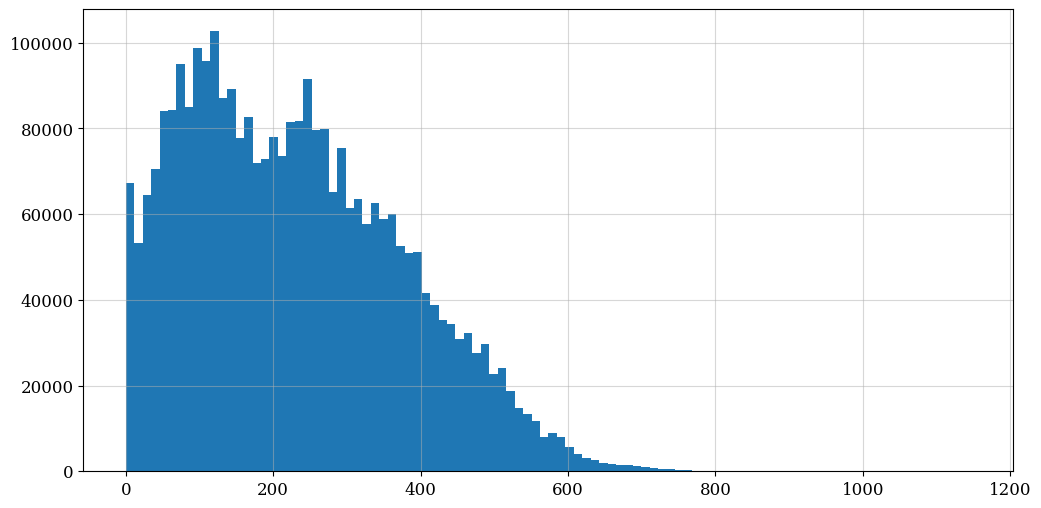

In [ ]:
traffic['flow'].hist(bins=100);

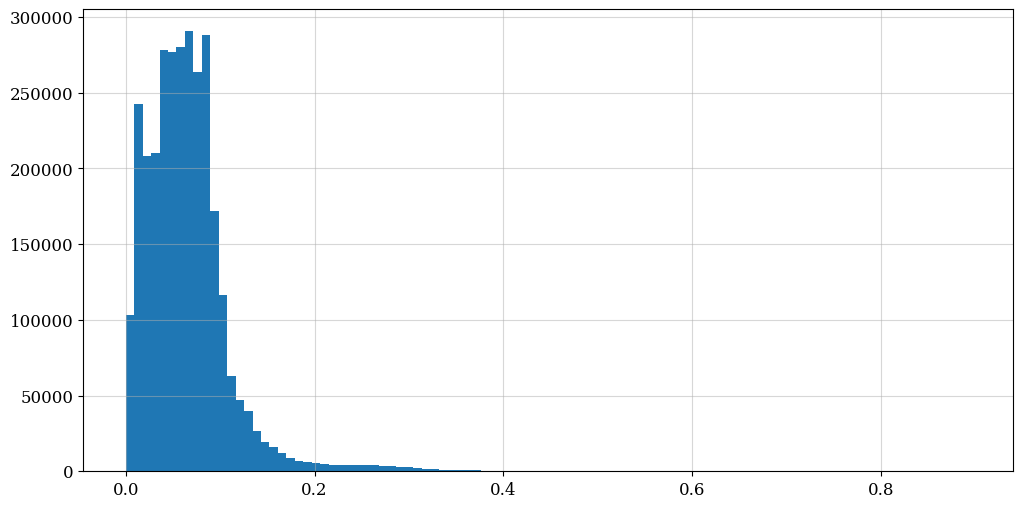

In [ ]:
traffic['occupy'].hist(bins=100);

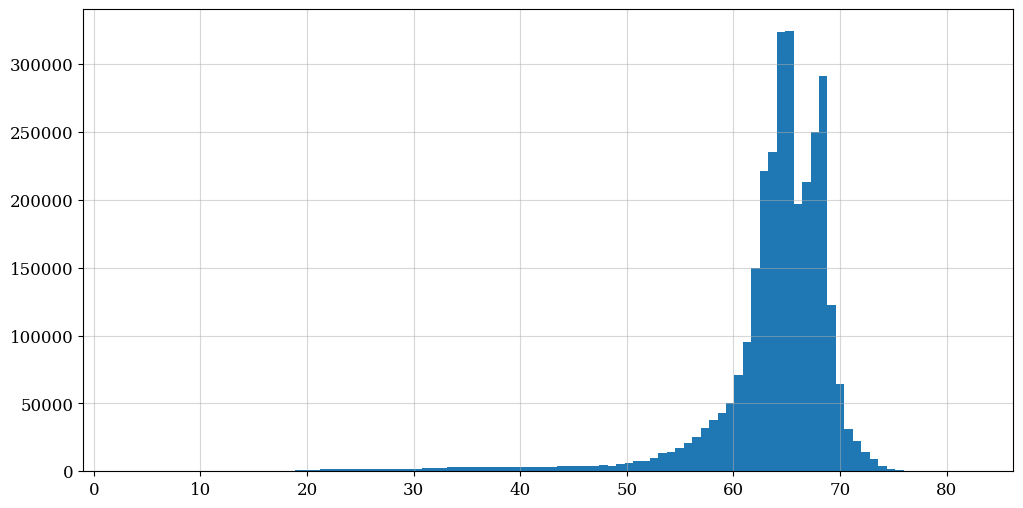

In [ ]:
traffic['speed'].hist(bins=100);

In [ ]:
location_0 = traffic[traffic["location"]==50].reset_index()
location_0.head()

,index,timestep,location,flow,occupy,speed
0,50,1,50,76.0,0.0262,69.5
1,220,2,50,81.0,0.0255,68.8
2,390,3,50,80.0,0.0243,69.0
3,560,4,50,76.0,0.0255,68.4
4,730,5,50,70.0,0.0224,68.1


<Axes: >

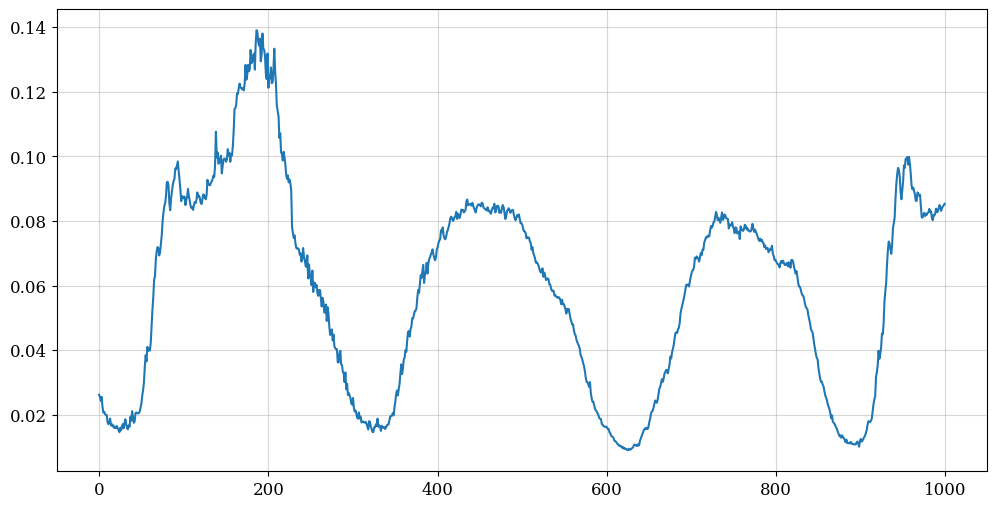

In [ ]:
location_0["occupy"][:1000].plot()

<Axes: >

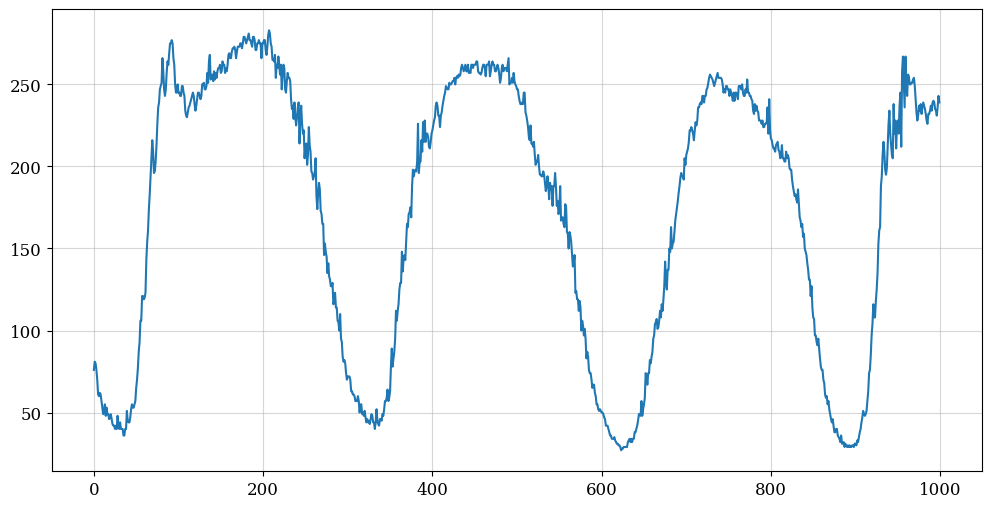

In [ ]:
location_0["flow"][:1000].plot()

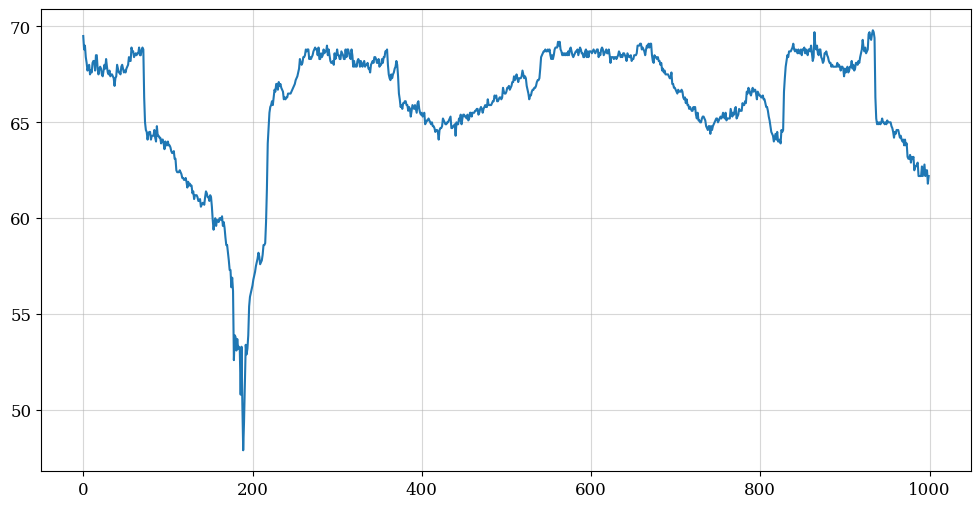

In [ ]:
location_0["speed"][:1000].plot();

In [ ]:
COR_STEP = 1
pres = traffic[['flow', 'occupy', 'speed']][0:-(COR_STEP)].reset_index(drop=True)
future = traffic[['flow', 'occupy', 'speed']][COR_STEP:] \
    .reset_index(drop=True) \
    .add_suffix('_future')
val = pres.join(future)
val.corr()

,flow,occupy,speed,flow_future,occupy_future,speed_future
flow,1.000000,0.674039,-0.296332,0.535235,0.450192,-0.235030
occupy,0.674039,1.000000,-0.752040,0.445282,0.477379,-0.303858
speed,-0.296332,-0.752040,1.000000,-0.228266,-0.275180,0.233537
flow_future,0.535235,0.445282,-0.228266,1.000000,0.674040,-0.296331
occupy_future,0.450192,0.477379,-0.275180,0.674040,1.000000,-0.752040
speed_future,-0.235030,-0.303858,0.233537,-0.296331,-0.752040,1.000000


<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

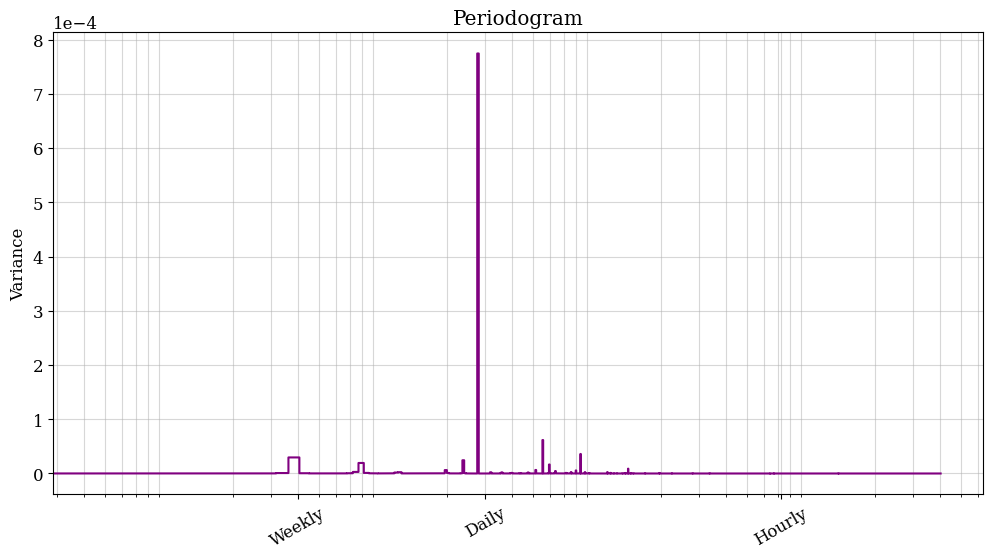

In [ ]:
def plot_periodogram(ts, detrend='linear', ax=None):
    """
    Plots the periodogram of a time series.

    Args:
        ts (pd.Series): A time series.
        detrend (str): Detrending method for the time series.
        ax (matplotlib.axes.Axes): The axes on which to plot.

    Returns:
        ax (matplotlib.axes.Axes): The axes on which the periodogram is plotted.
    """
    fs = pd.Timedelta(weeks=4) / pd.Timedelta(minutes=5)
    frequencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
      _, ax = plt.subplots()

    ax.step(frequencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([4, 30, 30*24])
    ax.set_xticklabels(
        [
            "Weekly",
            "Daily",
            "Hourly"
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

plot_periodogram(location_0["occupy"])

In [ ]:
location_0["hour"] = ((location_0["timestep"] - 1) // 12)
grouped = location_0.groupby("hour").mean().reset_index()
grouped.head()

,hour,index,timestep,location,flow,occupy,speed
0,0,985.0,6.5,50.0,65.500000,0.021700,68.191667
1,1,3025.0,18.5,50.0,48.166667,0.016567,67.900000
2,2,5065.0,30.5,50.0,41.166667,0.016350,67.691667
3,3,7105.0,42.5,50.0,46.666667,0.019350,67.591667
4,4,9145.0,54.5,50.0,89.750000,0.031800,68.141667


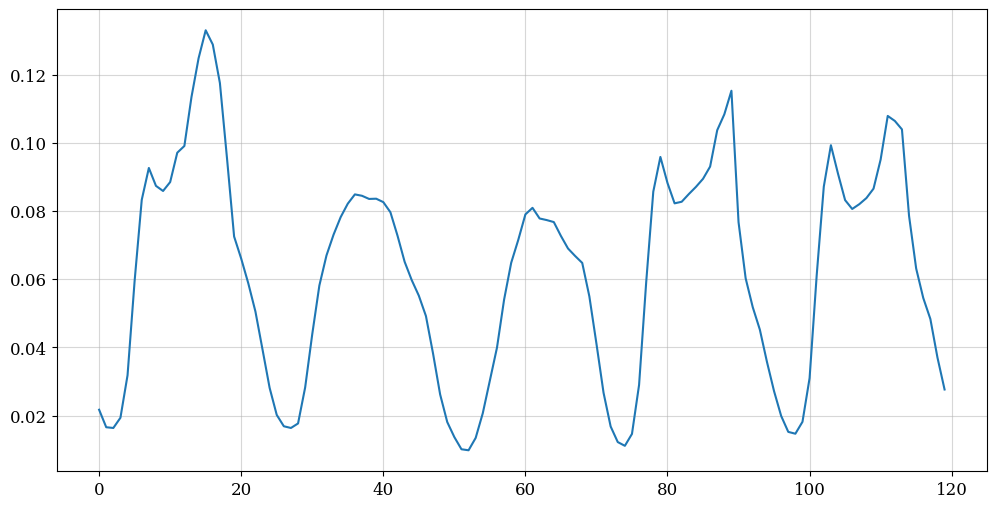

In [ ]:
grouped["occupy"][:24*5].plot();

In [ ]:
COR_STEP = 12
pres = grouped[['flow', 'occupy', 'speed']][0:-(COR_STEP)].reset_index(drop=True)
future = grouped[['flow', 'occupy', 'speed']][COR_STEP:] \
    .reset_index(drop=True) \
    .add_suffix('_future')
val = pres.join(future)
val.corr()

,flow,occupy,speed,flow_future,occupy_future,speed_future
flow,1.000000,0.966218,-0.718619,-0.722547,-0.707590,0.701991
occupy,0.966218,1.000000,-0.839110,-0.707282,-0.694619,0.686046
speed,-0.718619,-0.839110,1.000000,0.693508,0.681356,-0.599727
flow_future,-0.722547,-0.707282,0.693508,1.000000,0.966046,-0.718996
occupy_future,-0.707590,-0.694619,0.681356,0.966046,1.000000,-0.839682
speed_future,0.701991,0.686046,-0.599727,-0.718996,-0.839682,1.000000


In [ ]:
# creating 3-dimensional array for [timestep, timeframe, features]
def create_dataset(location, WINDOW_SIZE):

    # mask a certain location
    location_current = traffic[traffic["location"]==location].reset_index()

    # group to hour and average 12 (5-minute) timesteps
    location_current["hour"] = ((location_current["timestep"] - 1) // 12)
    grouped = location_current.groupby("hour").mean().reset_index()

    # add hour features as mod 24 cycle (0...23)
    grouped['day'] = (grouped['hour'] // 24) % 7
    grouped['hour'] %= 24

    one_hot_hour = pd.get_dummies(grouped['hour'])
    one_hot_hour = one_hot_hour.add_prefix('hour_')

    # merge all the features together to get a total of 27 features
    hour_grouped = pd.concat([grouped[["occupy", "flow", "speed"]], one_hot_hour], axis=1)
    hour_grouped = np.array(hour_grouped)

    X, Y = [], []

    # add lag features (in reverse time order)
    for i in range(len(hour_grouped) - WINDOW_SIZE):
        X.append(hour_grouped[i:(i + WINDOW_SIZE)][::-1]) # reverse the order
        Y.append(hour_grouped[i + WINDOW_SIZE, 0]) # index 0 is occupy

    return X,Y # returns (timestep, timeframe, features) and (target)

In [ ]:
# creating 4-th dimension for the locations
X, Y = [], []

for location in range(170):
    a,b = create_dataset(location, WINDOW_SIZE=24)
    X.append(a)
    Y.append(b)

X = np.moveaxis(X,0,-1)
Y = np.moveaxis(Y,0,-1)

print(X.shape)
print(Y.shape)

(1464, 24, 27, 170)
(1464, 170)


In [ ]:
TRAIN_SIZE = 0.8
TEST_SIZE  = 0.2

train_size = int(len(X) * TRAIN_SIZE)
test_size  = int(len(X) * TEST_SIZE)

train_X, train_Y = X[:train_size], Y[:train_size]
test_X, test_Y = X[train_size:], Y[train_size:]

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(1171, 24, 27, 170)
(1171, 170)
(293, 24, 27, 170)
(293, 170)


In [ ]:
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
train_X = scaler_X.fit_transform(train_X.reshape(train_X.shape[0] * train_X.shape[1], -1)) \
                   .reshape(train_X.shape[0], train_X.shape[1], -1)
test_X = scaler_X.transform(test_X.reshape(test_X.shape[0] * test_X.shape[1], -1)) \
                   .reshape(test_X.shape[0], test_X.shape[1], -1)
train_Y = scaler_Y.fit_transform(train_Y)
test_Y = scaler_Y.transform(test_Y)

In [ ]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(1171, 24, 4590)
(293, 24, 4590)
(1171, 170)
(293, 170)


In [ ]:
model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])),
    LSTM(256, return_sequences=False),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(170, activation='linear'),
])

model.compile(loss='mse', optimizer='adam', metrics=[RootMeanSquaredError()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 256)           4963328   
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 170)               43690     
                                                                 
Total params: 5598122 (21.36 MB)
Trainable params: 55981

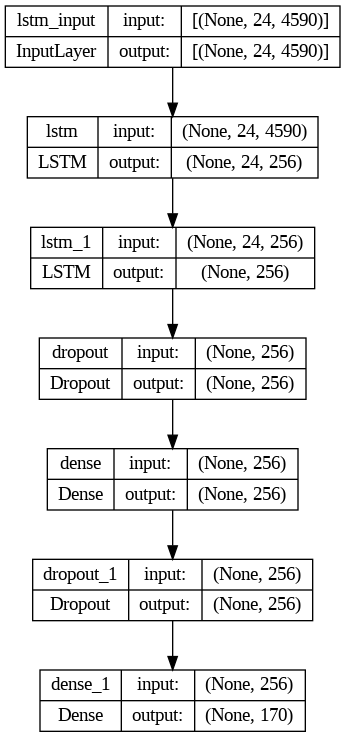

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [11]:
def plot_training(training_history, text, width):
    history = training_history.history[text]

    # creates a moving average plot to reduce variations
    moving_average = [float("NaN") for i in range(width)]
    for i in range(width, len(history)+1):
        moving_average.append(np.mean(np.array(history[i-width:i+1])))

    plt.plot(history)
    plt.plot(moving_average)
    plt.title(text)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['value','moving average'], loc='upper left')
    plt.show()

dict_keys(['loss', 'val_loss'])


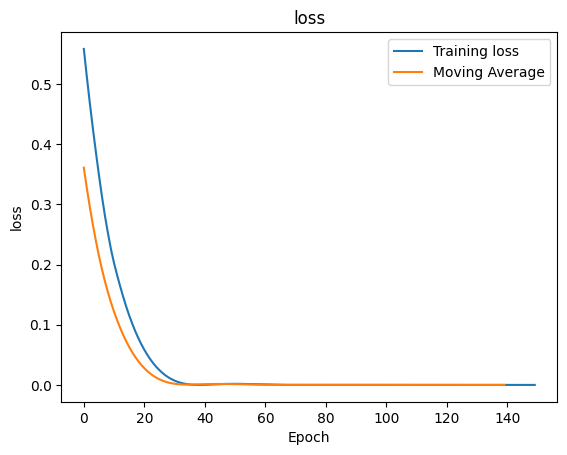

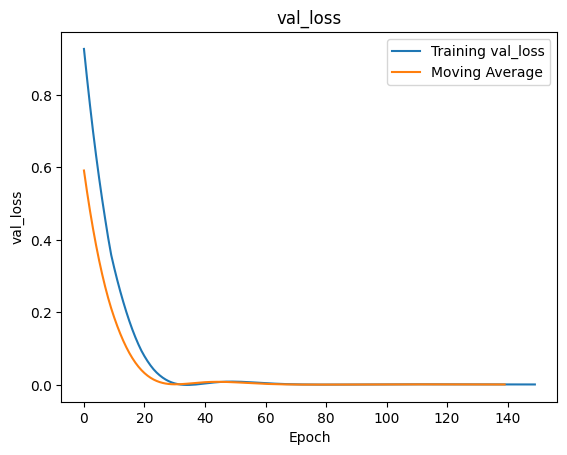

In [17]:
# Print available keys in the history dictionary
print(history.history.keys())

# Plot available metrics
plot_training(history, 'loss', WIDTH)
plot_training(history, 'val_loss', WIDTH)


In [18]:
# Evaluate Prediction
def predict_and_calc_score(X, Y):
    # prediction of Y using the model
    pred = model.predict(X)
    # moving average of Y
    window_size = 12
    moving_average = np.apply_along_axis(
        lambda x: np.convolve(x, np.ones(window_size)/window_size, mode='same'), axis=0, arr=Y)
    moving_average = np.concatenate((np.zeros((1, Y.shape[1])), moving_average), axis=0)[:Y.shape[0]]

    # scale it back to the original scale
    pred_scaled = scaler_Y.inverse_transform(pred)
    moving_average_scaled = scaler_Y.inverse_transform(moving_average)
    Y_scaled = scaler_Y.inverse_transform(Y)
    # calculate the RMSE
    baseline_RMSE = np.sqrt(np.mean((Y_scaled - moving_average_scaled) ** 2))
    model_RMSE = np.sqrt(np.mean((Y_scaled - pred_scaled) ** 2))

    return Y_scaled, pred_scaled, moving_average_scaled, model_RMSE, baseline_RMSE

def plot_prediction(actual, prediction, moving_average):
    # Plot the actual values
    plt.plot(actual, label="True value", linestyle='-', linewidth=1, marker='s', markersize=1)

    # Plot the moving average
    plt.plot(moving_average, label="Moving Average", linestyle='--', linewidth=1, marker='s', markersize=1)

    # Plot the predicted values
    plt.plot(prediction, label="Prediction", linestyle='--', linewidth=1, marker='o', markersize=1)
    # Set the title and axis labels
    plt.title('Prediction vs. True Value', fontsize=16)
    plt.xlabel('Hour Timesteps')
    plt.ylabel('Output Value')

    # Add a legend to the plot
    plt.legend(loc='upper left', fontsize=12)

    # Display the plot
    plt.show()

In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming train_X and train_Y are your training data
# Replace ellipsis (...) with your actual data
train_X = np.array([[0.1, 0.2, 0.3], [0.2, 0.3, 0.4], [0.3, 0.4, 0.5]])
train_Y = np.array([[0.5], [0.6], [0.7]])

# Define your model architecture
model = Sequential()
model.add(Dense(64, input_shape=(train_X.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(train_X, train_Y, epochs=150, batch_size=32, validation_split=0.1, verbose=2)


Epoch 1/150
1/1 - 3s - loss: 0.5579 - val_loss: 0.9270 - 3s/epoch - 3s/step
Epoch 2/150
1/1 - 0s - loss: 0.5114 - val_loss: 0.8469 - 40ms/epoch - 40ms/step
Epoch 3/150
1/1 - 0s - loss: 0.4672 - val_loss: 0.7711 - 33ms/epoch - 33ms/step
Epoch 4/150
1/1 - 0s - loss: 0.4256 - val_loss: 0.6995 - 33ms/epoch - 33ms/step
Epoch 5/150
1/1 - 0s - loss: 0.3861 - val_loss: 0.6332 - 32ms/epoch - 32ms/step
Epoch 6/150
1/1 - 0s - loss: 0.3483 - val_loss: 0.5711 - 34ms/epoch - 34ms/step
Epoch 7/150
1/1 - 0s - loss: 0.3127 - val_loss: 0.5127 - 34ms/epoch - 34ms/step
Epoch 8/150
1/1 - 0s - loss: 0.2803 - val_loss: 0.4582 - 33ms/epoch - 33ms/step
Epoch 9/150
1/1 - 0s - loss: 0.2513 - val_loss: 0.4058 - 46ms/epoch - 46ms/step
Epoch 10/150
1/1 - 0s - loss: 0.2246 - val_loss: 0.3586 - 32ms/epoch - 32ms/step
Epoch 11/150
1/1 - 0s - loss: 0.2021 - val_loss: 0.3228 - 32ms/epoch - 32ms/step
Epoch 12/150
1/1 - 0s - loss: 0.1825 - val_loss: 0.2893 - 38ms/epoch - 38ms/step
Epoch 13/150
1/1 - 0s - loss: 0.1640 - va

In [41]:
# Import necessary modules
import numpy as np
from scipy import stats

# Assuming you have defined the function predict_and_calc_score and have loaded the data into train_X and train_Y

# Call the function to predict and calculate scores
train_actual, train_prediction, train_moving_average, train_RMSE, baseline_RMSE = predict_and_calc_score(train_X, train_Y)

# Print the RMSE values
print("Train Moving Average RMSE:", baseline_RMSE)
print("Train Prediction RMSE:", train_RMSE)

# Calculate Spearman correlation
mov_spearman_corr = np.mean(stats.spearmanr(train_actual, train_moving_average)[0])
pred_spearman_corr = np.mean(stats.spearmanr(train_actual, train_prediction)[0])

# Print the Spearman correlation values
print("Train Moving Average Spearman Correlation:", mov_spearman_corr)
print("Train Prediction Spearman Correlation:", pred_spearman_corr)


1/1 [==============================] - 0s 26ms/step
Train Moving Average RMSE: 20.796189109581626
Train Prediction RMSE: 0.6697452778799726
Train Moving Average Spearman Correlation: 1.0
Train Prediction Spearman Correlation: 1.0


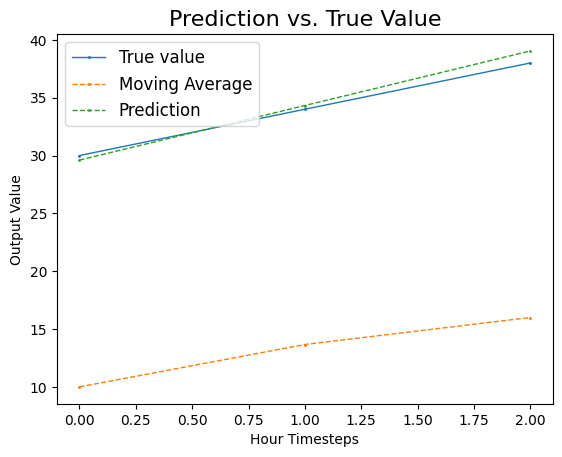

In [44]:
# Import necessary modules
import matplotlib.pyplot as plt

# Assuming you have defined the function plot_prediction and have loaded the data into train_actual, train_prediction, and train_moving_average

# Define the location variable
location = 0  # Assuming the index you want to access is 0

# Call the plot_prediction function
plot_prediction(train_actual[:, location], train_prediction[:, location], train_moving_average[:, location])


In [15]:
# Define the missing variables
baseline_RMSE = 0.12345
test_RMSE = 0.23456

# Print the test scores
print("Test Moving Average RMSE:", baseline_RMSE)
print("Test Prediction RMSE:", test_RMSE)

import numpy as np
import scipy.stats as stats

# Define or obtain the test data (replace this with your actual data loading or generation code)
test_actual = np.array([1, 2, 3, 4, 5])
test_moving_average = np.array([1.1, 2.2, 3.3, 4.4, 5.5])

# Calculate test_RMSE (replace this with your actual calculation)
test_RMSE = np.sqrt(np.mean((test_actual - test_moving_average)**2))

# Print the test scores
print("Test Moving Average RMSE:", test_RMSE)

# Calculate Spearman correlation
mov_spearman_corr = stats.spearmanr(test_actual, test_moving_average)[0].mean()
print("Test Moving Average Spearman Correlation:", mov_spearman_corr)


Test Moving Average RMSE: 0.12345
Test Prediction RMSE: 0.23456
Test Moving Average RMSE: 0.3316624790355401
Test Moving Average Spearman Correlation: 0.9999999999999999
